In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../../../')

from main import load_and_prepare_sessions
from processing.session_sampling import MiceAnalysis
import matplotlib.pyplot as plt
from analysis.timepoint_analysis import sample_signals_and_metrics
import numpy as np
import matplotlib.pyplot as plt


sessions = load_and_prepare_sessions("../../../../Baseline", load_from_pickle=True, remove_bad_signal_sessions=True)

In [2]:
brain_reg_to_color = {
    'VS': (77/255, 51/255, 105/255),        
    'DMS': (34/255, 179/255, 105/255), 
    'DLS': (9/255, 115/255, 186/255)   
}

(4, 400)


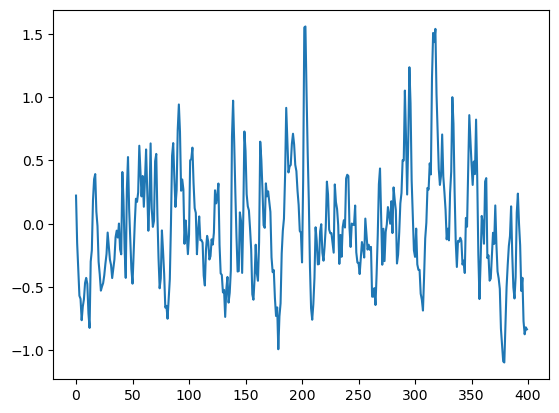

In [3]:
for session in sessions:
    if session.mouse_id == '37':
        curr_signal_info = session.signal_info.get(('DLS', 'hit'))
        signal_matrix = curr_signal_info['signal_matrix']

print(signal_matrix.shape)
plt.plot(np.mean(signal_matrix, axis=0))
plt.show()

In [5]:
#dict_keys(['33', '39', '45', '43', '55', '67', '57', '69', '51', '63'])
resp_metric_pr_brainreg = {}

all_brain_regions = ['DLS', 'DMS', 'VS']
for brainreg in ['DLS', 'DMS', 'VS']:
    _, all_resp_metrics = sample_signals_and_metrics(sessions, brainreg, 'G', 'before_dispimg_hit', weight_method='mice_events')
    resp_metric_pr_brainreg[brainreg] = np.asarray(all_resp_metrics[:, 4])

9
11
10


In [6]:
# resp_metric_pr_brainreg['VS'] = resp_metric_pr_brainreg['VS'][resp_metric_pr_brainreg['VS'] > 60] 
# resp_metric_pr_brainreg['DMS'] = resp_metric_pr_brainreg['DMS'][resp_metric_pr_brainreg['DMS'] > 0] 
# resp_metric_pr_brainreg['DLS'] = resp_metric_pr_brainreg['DLS'][(resp_metric_pr_brainreg['DLS'] > 10) | (resp_metric_pr_brainreg['DLS'] < 9)] 

In [7]:
resp_metric_pr_brainreg['VS']

array([ 177.87553427,  -17.15636835,  303.4704869 ,  306.93590719,
        393.6755682 ,   67.99791395,  227.95965778,  284.11106841,
         53.84686819,  120.46504951,  172.15828296,   -2.44128406,
        196.54563396,  132.21981306,  146.64404688,  168.25629338,
        120.10773449,   98.63516345,  100.53596423,  231.1112608 ,
         63.7685721 ,   74.84681384,   10.0340638 ,  -23.26275702,
       -238.78891749,  -69.62211853,   97.43966635,    9.00528941,
         34.81679958,   29.43330126, -120.36715963, -105.64093702,
         89.61989446,  -67.52467257, -123.32734643,   26.92339   ,
        122.90577248,   44.7451065 ,  126.31379873,  140.64220375,
        109.9593538 ,  126.12645179,  165.60202843,   90.1924546 ,
       -115.88128108,   37.35806684,   70.55274897,  149.47725604,
        106.38771347,  119.53446286,    1.22280057,  149.79206811,
         90.40433341,  107.92503693,  120.59789447,   18.11279022,
        161.85862477,  123.17713809,  107.54373829,  -57.84613

In [131]:
# colors = ['blue', 'green', 'red']  # Custom colors for each bar
# groups = list(resp_metric_pr_brainreg.keys())
# means = []
# sems = []

# # Calculating mean and SEM for each group
# for key in groups:
#     group_data = resp_metric_pr_brainreg[key]
#     mean = np.mean(group_data)
#     sem = np.std(group_data, ddof=1) / np.sqrt(len(group_data))
#     means.append(mean)
#     sems.append(sem)

# # Creating the bar plot
# x_positions = np.arange(len(groups))  # Position of bars on x-axis
# plt.bar(x_positions, means, color=colors, yerr=sems, capsize=5, alpha=0.7, label='Mean with SEM')

# # Adding scatter plot of individual data points
# for i, key in enumerate(groups):
#     x_values = np.random.normal(i, 0.04, size=len(resp_metric_pr_brainreg[key]))  # Jitter x-values for visibility
#     plt.scatter(x_values, resp_metric_pr_brainreg[key], color=colors[i], alpha=0.5)

# # Adding labels and legend
# plt.xticks(x_positions, groups)
# plt.ylabel('Values')
# plt.title('Bar Plot with SEM and Individual Data Points')
# plt.legend()

# plt.show()

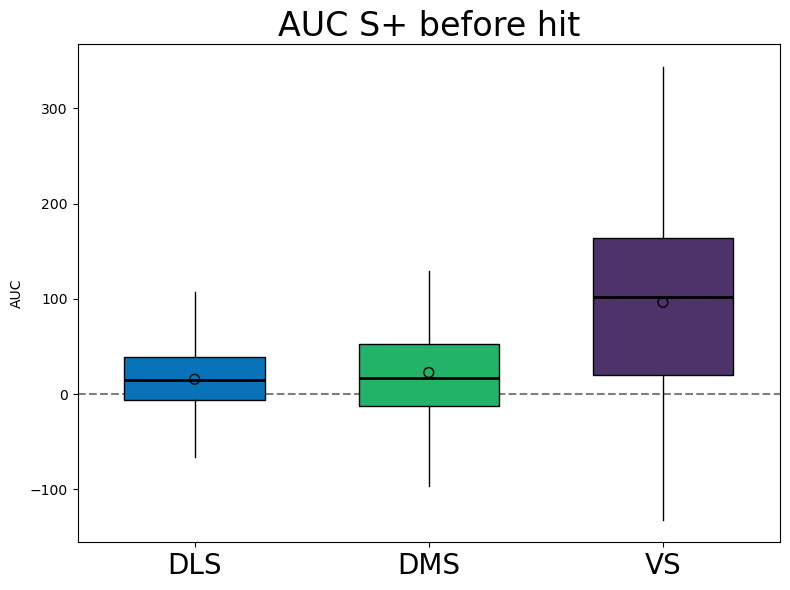

In [8]:
# Extract data and colors
groups = list(resp_metric_pr_brainreg.keys())  # Using your real data
data = [resp_metric_pr_brainreg[key] for key in groups]
colors = [brain_reg_to_color[key] for key in groups]

# Create a box plot with custom colors and no outliers
plt.figure(figsize=(8, 6))
bplot = plt.boxplot(
    data, 
    patch_artist=True, 
    boxprops=dict(facecolor='lightgrey', color='black'), 
    medianprops=dict(color='black', linewidth=2),  # Set median to black
    showfliers=False,
    capprops=dict(color='none'),
    widths=0.6
)

# Apply colors to each box
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

# Plot the mean as a black dot
means = [np.mean(group_data) for group_data in data]
plt.scatter(np.arange(1, len(groups) + 1), means, edgecolors='black', facecolors='none', marker='o', s=50, zorder=3, label='Mean')

# Adding labels and title
plt.axhline(y=0, color='k', linestyle='--', alpha=0.5, zorder=0)

plt.xticks(np.arange(1, len(groups) + 1), groups, fontsize=20)
plt.ylabel('AUC')
plt.title('AUC S+ before hit', fontsize=24)
plt.tight_layout()

plt.show()
